In [2]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# dataset Abalone
abalone = fetch_ucirepo(id=1)

X = abalone.data.features
y = abalone.data.targets

df = pd.concat([X, y], axis=1)

df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
numeric_df.shape


(4177, 8)

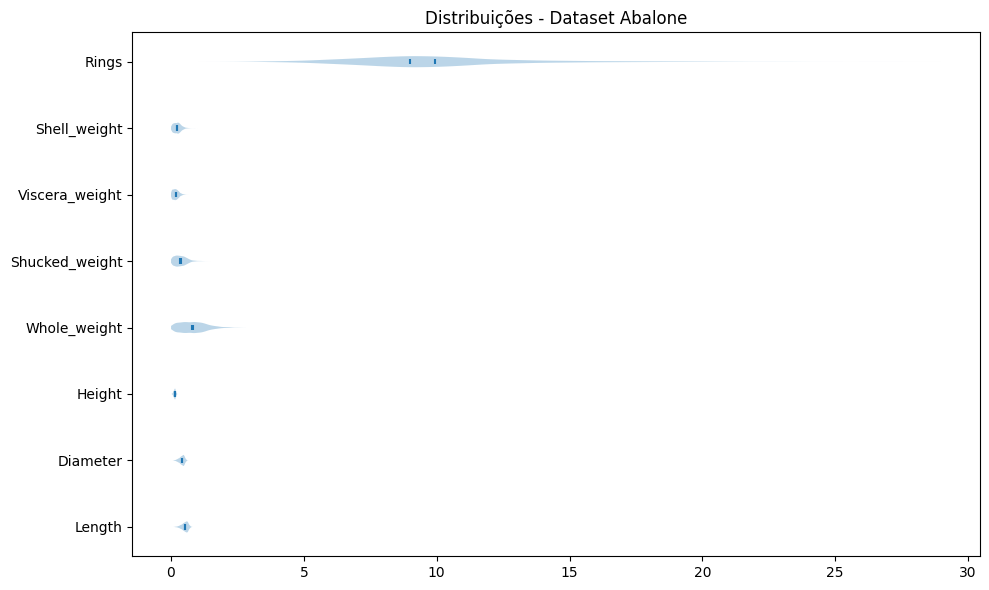

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de vetores (cada coluna = 1 violino)
data = [numeric_df[col].values for col in numeric_df.columns]

# posições verticais (agora para o eixo Y)
positions = np.arange(1, len(data)*3, 3)

fig, ax = plt.subplots(figsize=(10,6))

vp = ax.violinplot(
    data,
    positions=positions,
    showmeans=True,
    showmedians=True,
    showextrema=False,
    vert=False
)

# Etiquetas no eixo Y
ax.set_yticks(positions)
ax.set_yticklabels(numeric_df.columns)

plt.title("Distribuições - Dataset Abalone")
plt.tight_layout()
plt.show()


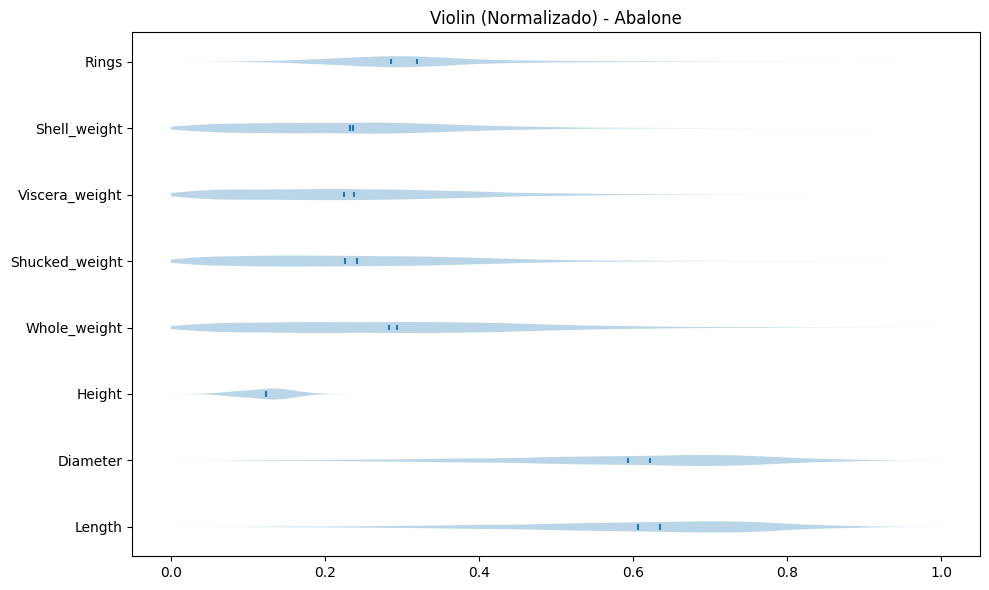

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(numeric_df)

data = [scaled[:, i] for i in range(scaled.shape[1])]
positions = np.arange(1, len(data)*3, 3)

fig, ax = plt.subplots(figsize=(10,6))

ax.violinplot(
    data,
    positions=positions,
    showmeans=True,
    showmedians=True,
    showextrema=False,
    vert=False
)

ax.set_yticks(positions)
ax.set_yticklabels(numeric_df.columns)

plt.title("Violin (Normalizado) - Abalone")
plt.tight_layout()
plt.show()
